In [21]:
from Functions import *

/Users/Mehdi/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [ ]:
## White noise

series = np.random.normal(0,1,625)

## Cov matrix

ind = np.int(np.sqrt(series.shape[0]))
corr_mat = abs(np.corrcoef(series.reshape(ind,ind)))

## Theoritical white noise cov matrice

tcorr_mat = np.zeros((corr_mat.shape))
np.fill_diagonal(tcorr_mat, 1)

In [ ]:
## Plot all the bootstrap:

Bootstraped_image = []

thresh = 0.15

x = corr_mat

level = 1

sim_range = 3


#for i in range(sim_range + 1):
#    if i == 0:
#        Bootstraped_image.append(x)
#    else:
#        Bootstraped_image.append(wavestrap_algo(x,thresh,level))
#        x = wavestrap_algo(x,thresh,level)
        
for i in range(sim_range + 1):
        Bootstraped_image.append(wavestrap_algo(x,thresh,level))
        x = wavestrap_algo(x,thresh,level)

In [ ]:
rng = len(Bootstraped_image)
EMD_mat = np.empty((rng,rng))
EMD_mat[:] = np.nan # to avoid the bug of the double for loop

for i in range(rng):
    for j in range(rng):
        warnings.filterwarnings("ignore")
        EMD_mat[i,j] = wav_EMD(Bootstraped_image[i],Bootstraped_image[j])

In [ ]:
## TSP

permutation, distance = solve_tsp_dynamic_programming(EMD_mat)

## Save the figures to compute to construct the confidence band.

Img_confidence = ["" for x in range(len(permutation))]

for i in range(len(permutation)):
    Img_confidence[i] = "Conf_int" + "_" + str(i) + ".png"

for i in range(len(permutation)):
    plt.imshow(Bootstraped_image[permutation[i]])
    plt.axis('off')
    plt.savefig(Img_confidence[i], bbox_inches = 'tight', pad_inches = 0)
    
## Save theoritical figure

t_wn = ""
t_wn = "theoritcal_wn" + ".png"

plt.imshow(tcorr_mat)
plt.axis('off')
plt.savefig(t_wn, bbox_inches = 'tight', pad_inches = 0)

In [ ]:
Lower_band, Upper_band = Conf_band(25,4)

In [ ]:
## Construct the final band to see if the new simulated noise is indeed a white noise.

Min_band = Lower_band.min()
Max_band = Upper_band.max()

## test for white noise

series = np.random.normal(0,1,625)

ind = np.int(np.sqrt(series.shape[0]))
corr_mat = abs(np.corrcoef(series.reshape(ind,ind)))

stochastic = ""
stochastic = "stochastic_porcess" + ".png"

plt.imshow(corr_mat)
plt.axis('off')
plt.savefig(stochastic, bbox_inches = 'tight', pad_inches = 0)

dim = np.int(np.sqrt(len(series)))

test_for_WN(Min_band,Max_band,stochastic,dim) # as suposed we can conclude for white noise

In [ ]:
plt.imshow(pep_salt(corr_mat,0.5))

In [ ]:
## test for white noise for another stoch process adding artificial noise

stochastic = ""
stochastic = "stochastic_porcess" + ".png"

plt.imshow(pep_salt(corr_mat,0.5))
plt.axis('off')
plt.savefig(stochastic, bbox_inches = 'tight', pad_inches = 0)

dim = np.int(np.sqrt(len(series)))

test_for_WN(Min_band,Max_band,stochastic,dim) # we can not conclude for white noise

In [1]:
import gstools as gs
# use CovModel as the base-class
class Gau(gs.CovModel):
    def cor(self, h):
        return np.exp(-h**2)

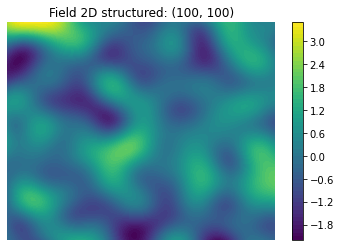

In [25]:
random_field = "random_field" + ".png"

x = y = range(100)
model = gs.Gaussian(dim=2, var=1, len_scale=10)
srf = gs.SRF(model, seed=20170519)
field = srf.structured([x, y])
srf.plot()
plt.axis('off')
plt.savefig(random_field, bbox_inches = 'tight', pad_inches = 0)

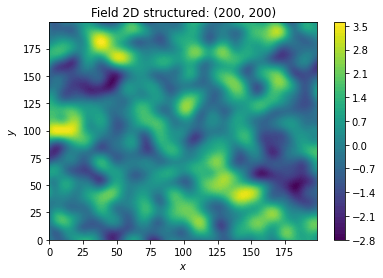

In [34]:
#gs.covmodel.Gaussian()
x = y = range(200)
srf = gs.SRF(gs.covmodel.Gaussian(dim=2, var=1, len_scale=10), seed=20170519)
field = srf.structured([x, y])
srf.plot()

In [ ]:
## Toeplitz matrix and 2D-random field (can be extended to nD-random field)

RF = []
size = 25
dimension = 2

for i in range(dimension):
    rand_field = np.random.normal(0,1,size**2)
    RF.append(rand_field)
    
Toeplitz = np.corrcoef(RF.reshape(ind,ind))